# Spam Email Classifier using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [2]:
# Load the dataset
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Inspect the data
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Initialize NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming and remove stopwords
    return ' '.join(words)

# Apply preprocessing to the messages
data['processed_message'] = data['message'].apply(preprocess_text)

# Inspect the processed data
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\addyf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [4]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the messages into a TF-IDF matrix
X = vectorizer.fit_transform(data['processed_message']).toarray()

# Get the labels
y = data['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary (ham = 0, spam = 1)

# Inspect the shape of the features
X.shape

(5572, 5000)

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
X_train.shape, X_test.shape

((4457, 5000), (1115, 5000))

In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

Accuracy: 0.9623


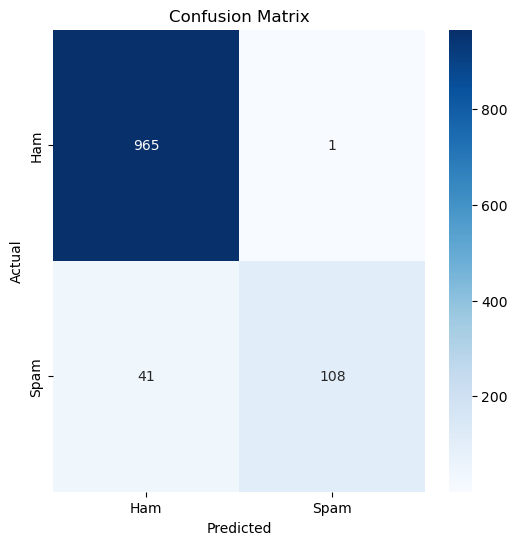

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [7]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))